<a href="https://colab.research.google.com/github/Altaieb-Mohammed/pytorch-tutorial-YouTube-/blob/main/lab1m%20analisiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"

df = pd.read_csv(url)
print(df.head(6))


                                                text      debts  \
0  The estate is worth $801,536.08. There are deb...  136423.38   
1  The estate is worth $943,375.41. There are deb...  178819.05   
2  The estate is worth $678,251.95. There are deb...  137791.13   
3  The estate is worth $364,967.06. There are deb...   74310.09   
4  The estate is worth $663,414.47. There are deb...    2302.81   
5  The estate is worth $152,855.39. There are deb...     454.23   

   funeral_expenses   bequests  wife  husband  son  daughter  father  mother  \
0           7866.29   70554.96     1        0    5         4       0       0   
1           9078.99  150491.37     1        1    4         5       0       1   
2           6276.24   19846.02     1        1    3         5       0       0   
3           9243.89   81648.92     0        0    4         0       0       0   
4           7015.85   15827.62     1        1    3         2       1       0   
5           7859.73    1920.94     0        1    0

In [2]:
#---------------------------------------------------------- Лабораторная работа №1:

# --- Загрузить данные из GitHub----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"

df = pd.read_csv(url)

# --- проверка признаков----------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Columns:", df.columns.tolist())

# Использование реальных имен столбцов из нашего набора данных----------------------------------------------------------------------------------------------------------------------------------------------------
numeric_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]

# ---  Чистые данные---
# Удалить строки с отсутствующими значениями в числовых столбцах------------------------------------------------------------------------------------------------------------------------------------------------
df_clean = df[numeric_features].dropna()

# удалить строки с неположительными значениями в финансовых столбцах.----------------------------------------------------------------------------------------------------------------------------------------------
for col in ['debts', 'funeral_expenses', 'bequests']:
    df_clean = df_clean[df_clean[col] > 0]

# --- Масштабирование ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_clean),
    columns=numeric_features
)

# Standard Scaling------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(
    standard_scaler.fit_transform(df_clean),
    columns=numeric_features
)

# ---  результаты  ------------------------------------------------------------------------------------------------------------
df_clean.to_csv('inheritance_cleaned.csv', index=False)
df_minmax.to_csv('inheritance_minmax_scaled.csv', index=False)
df_standard.to_csv('inheritance_standard_scaled.csv', index=False)

# ---  Preview ---------------------------------------------------------------------------------------------  Preview------------------------------------------------------------------------------------------------------
print("Cleaned data:\n", df_clean.head())
print("MinMax scaled:\n", df_minmax.head())
print("Standard scaled:\n", df_standard.head())


Columns: ['text', 'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild']
Cleaned data:
        debts  funeral_expenses   bequests  wife  husband  son  daughter  \
0  136423.38           7866.29   70554.96     1        0    5         4   
1  178819.05           9078.99  150491.37     1        1    4         5   
2  137791.13           6276.24   19846.02     1        1    3         5   
3   74310.09           9243.89   81648.92     0        0    4         0   
4    2302.81           7015.85   15827.62     1        1    3         2   

   father  mother  brother  sister  grandchild  
0       0       0        2       0           2  
1       0       1        2       3           2  
2       0       0        2       2           1  
3       0       0        1       3           2  
4       1       0        2       3           2  
MinMax scaled:
       debts  funeral_expenses  bequests  wife  husband  son  daughter  f

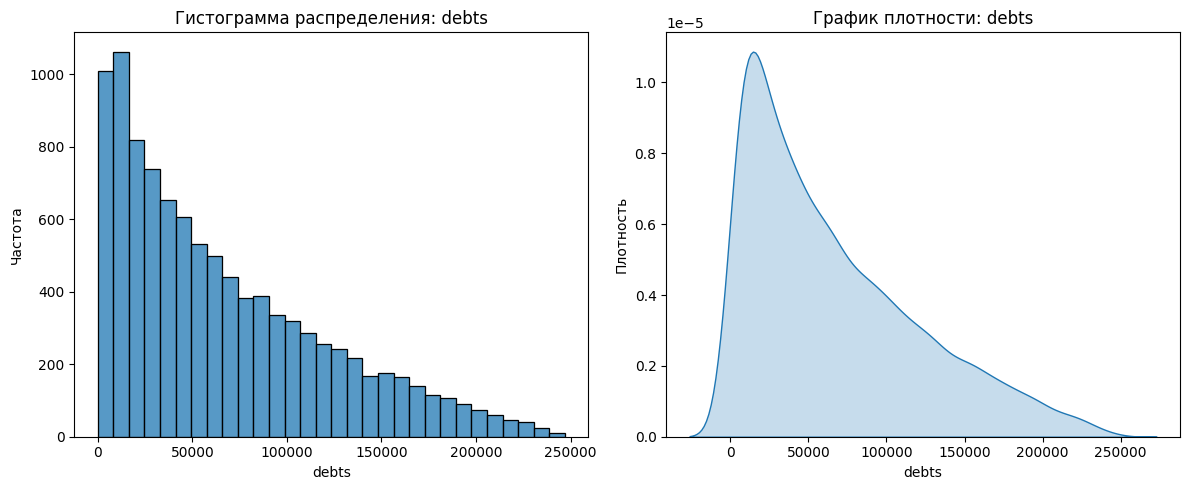

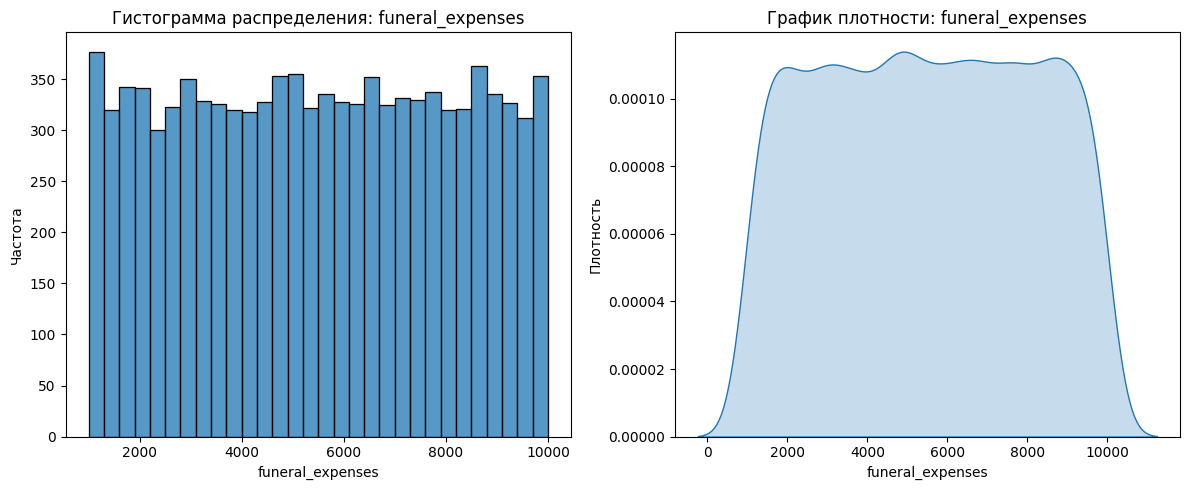

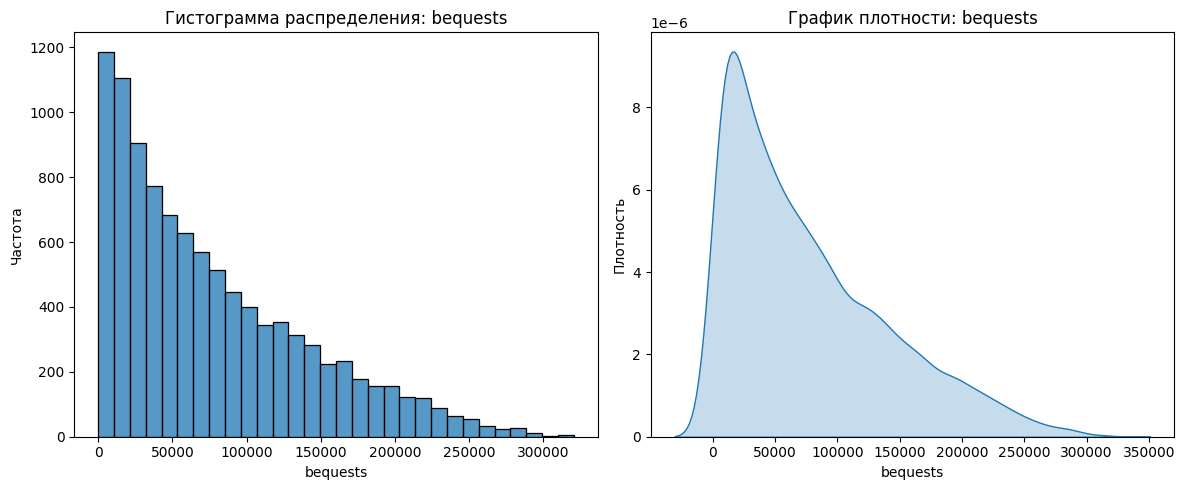

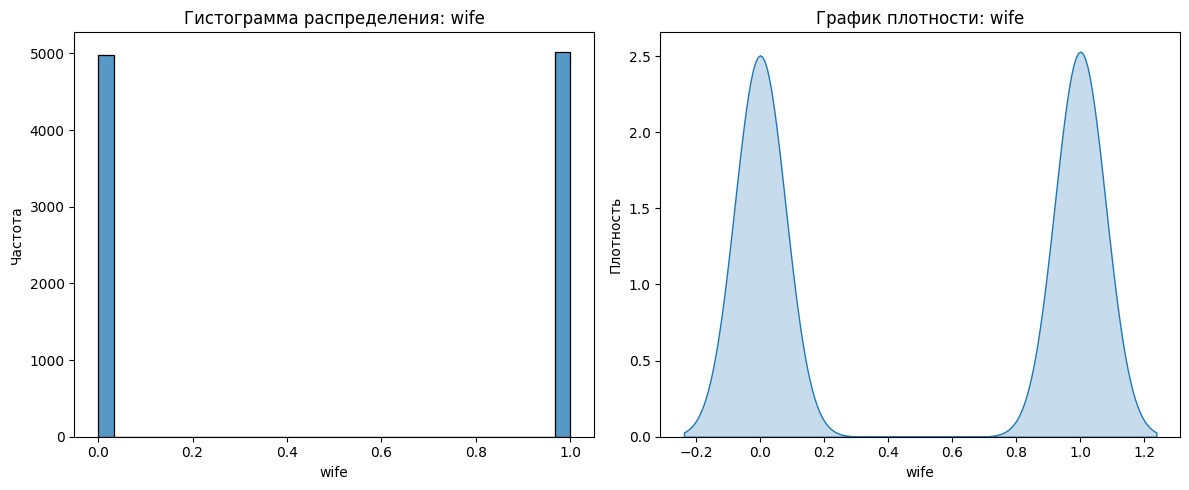

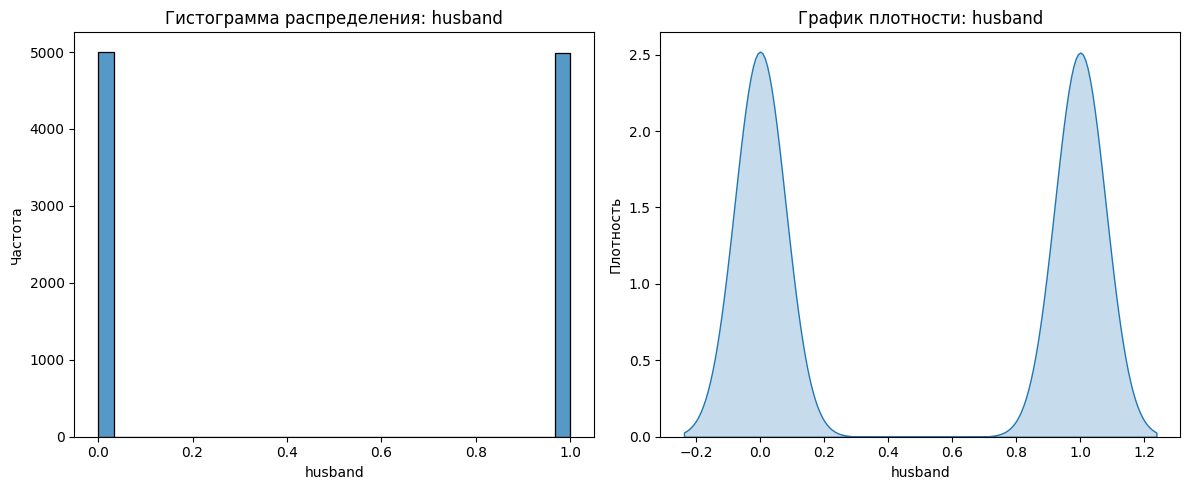

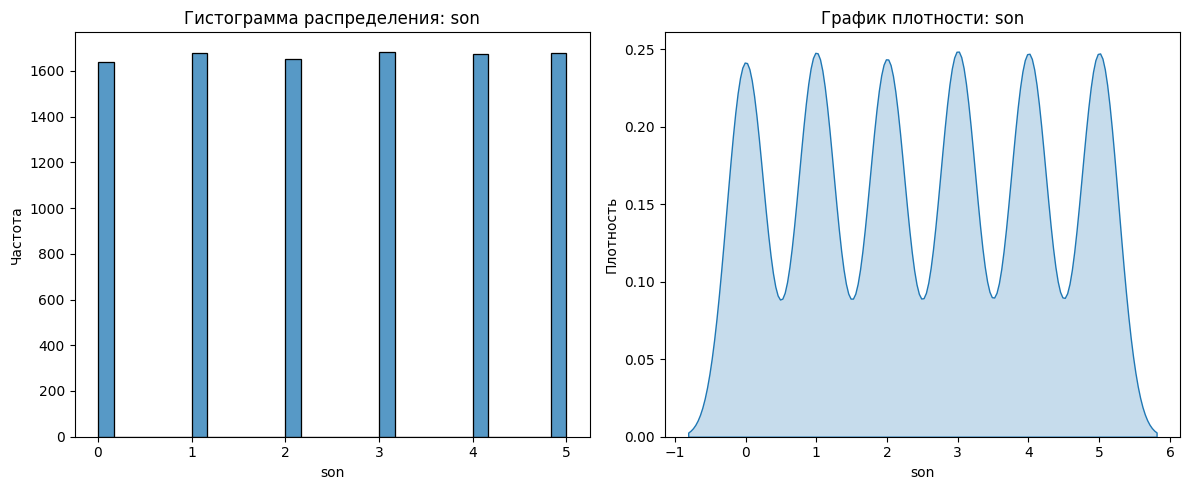

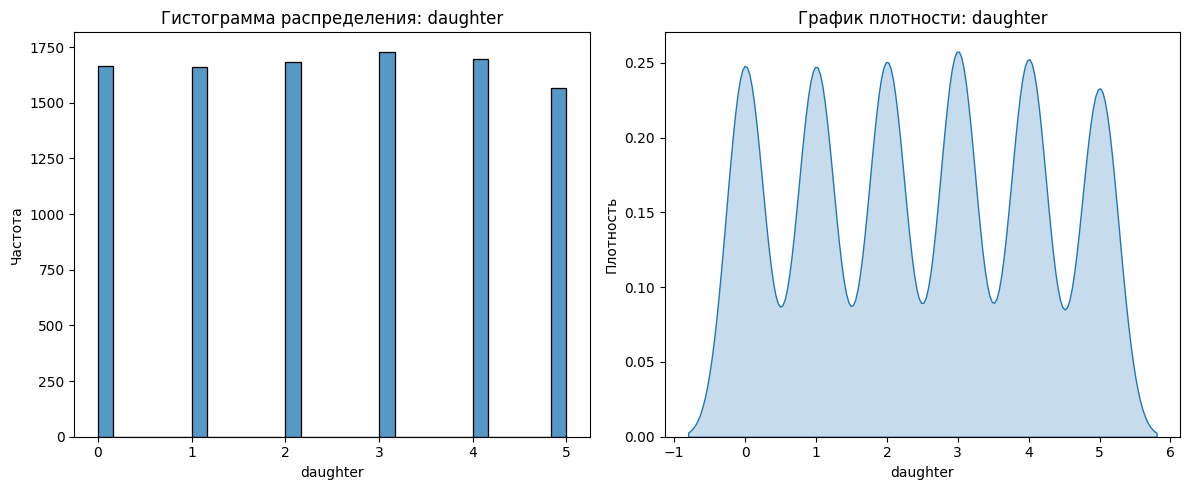

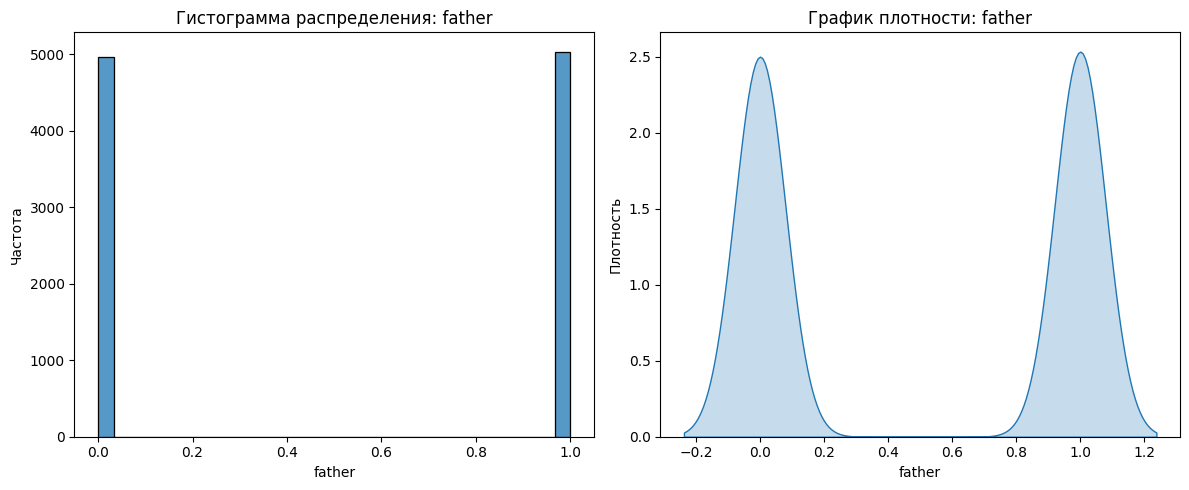

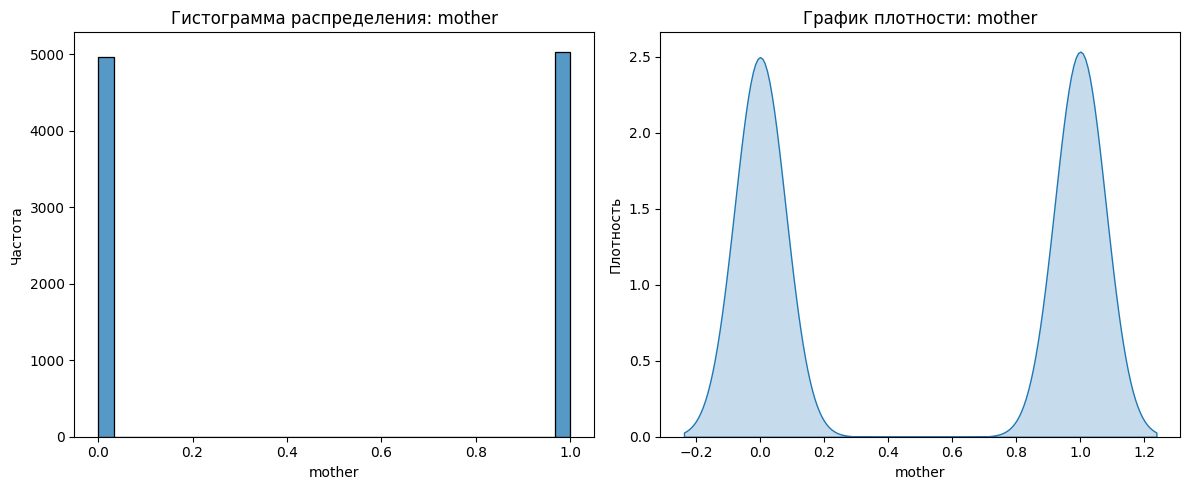

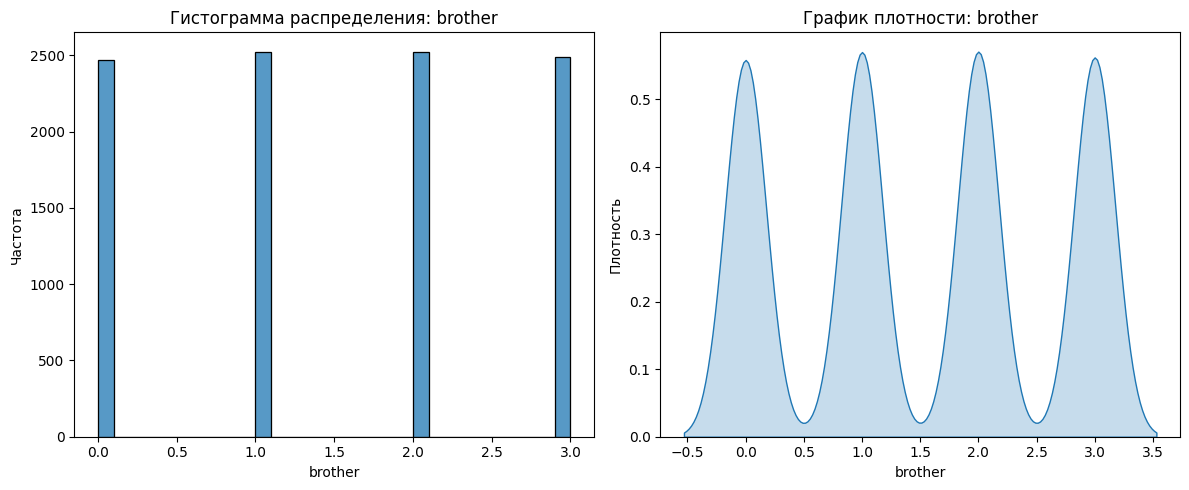

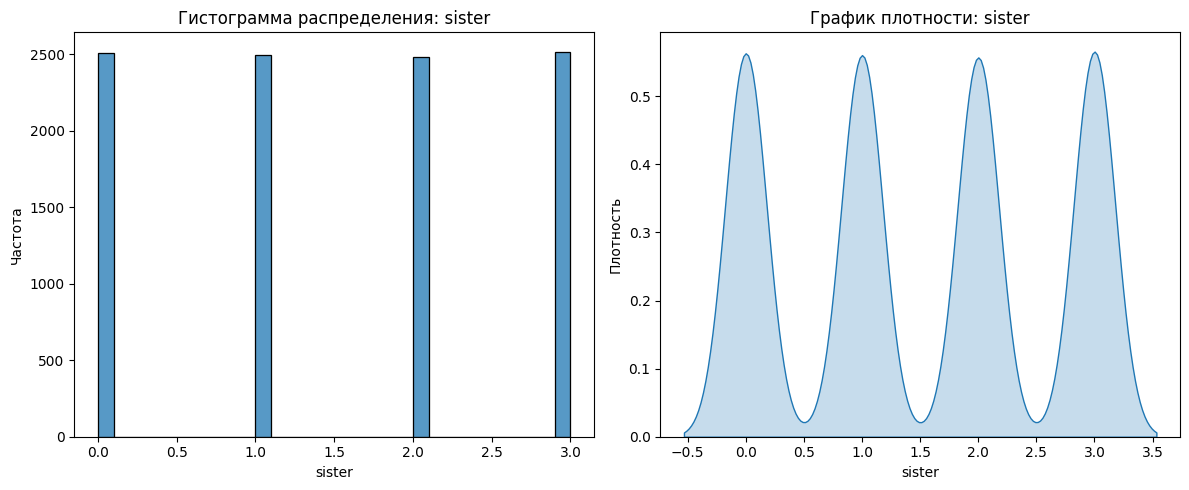

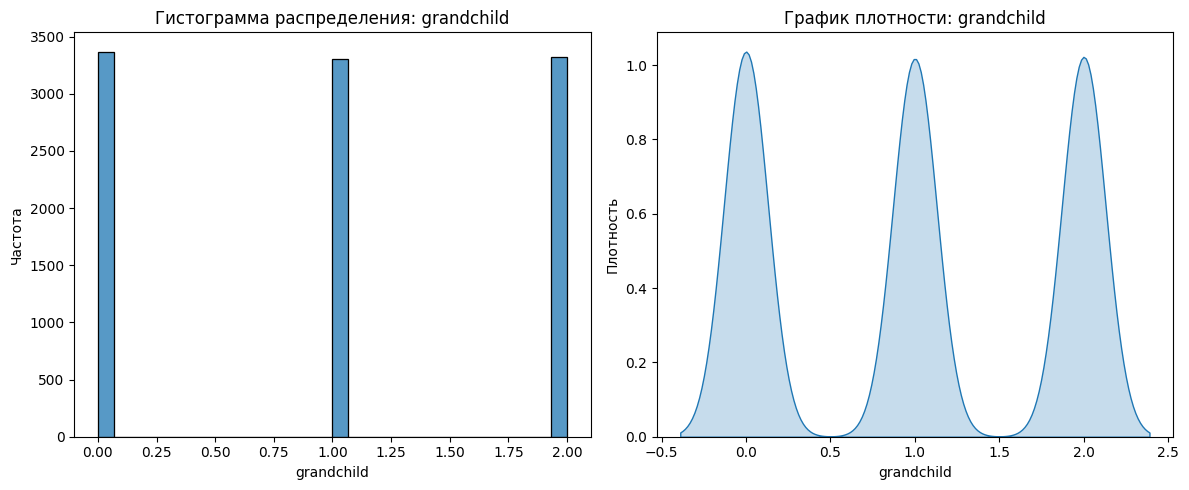

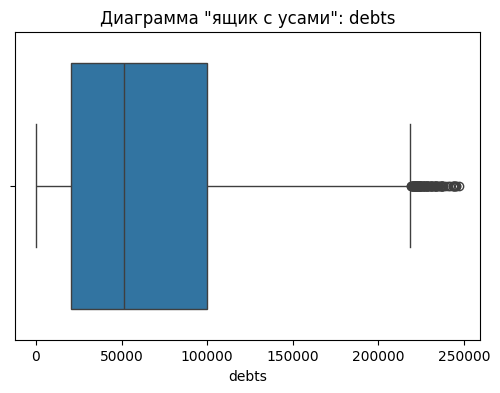

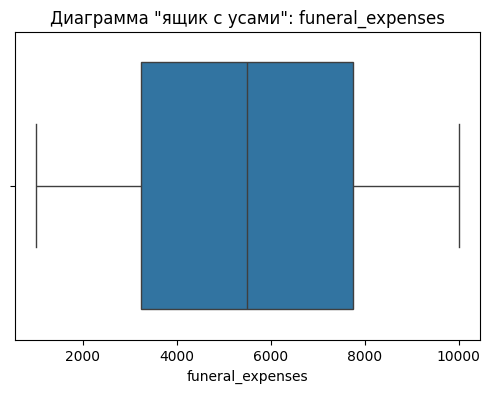

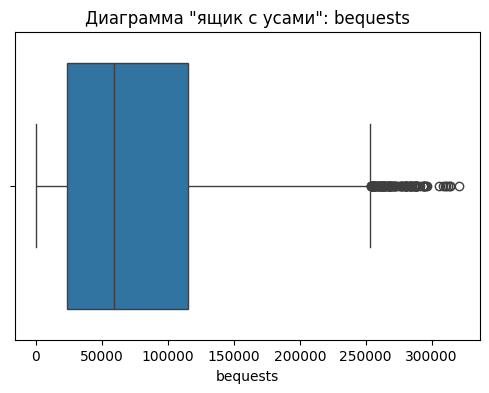

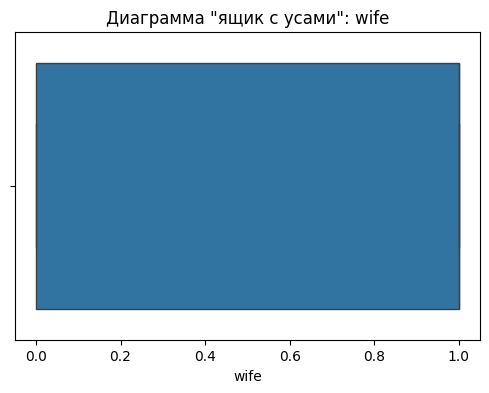

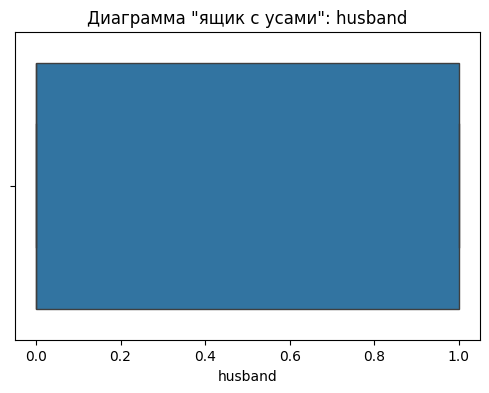

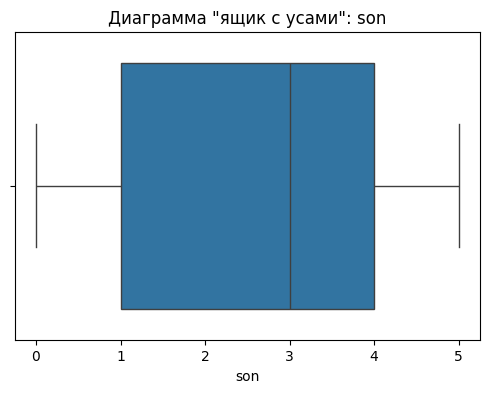

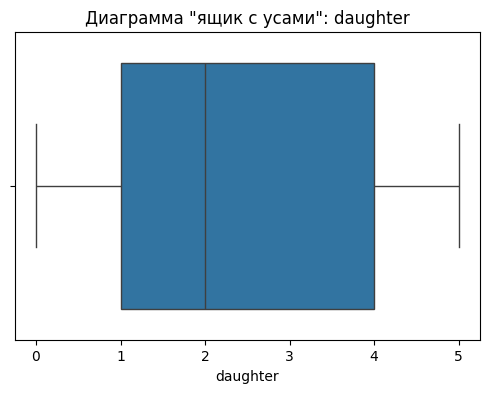

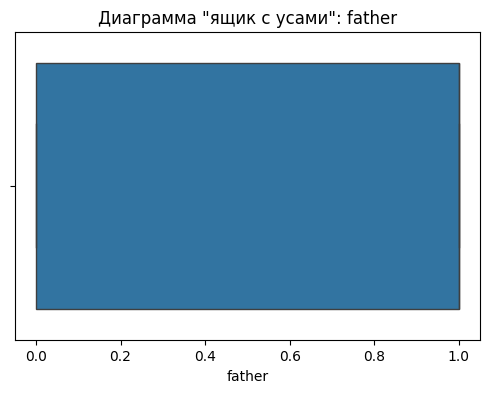

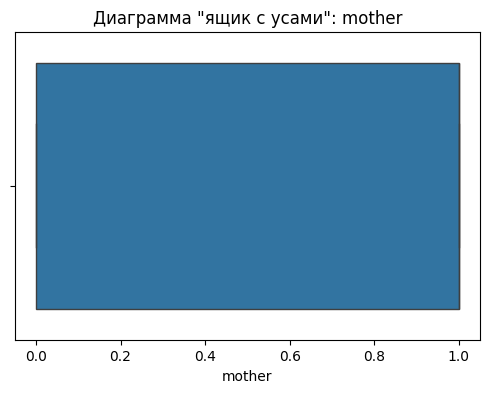

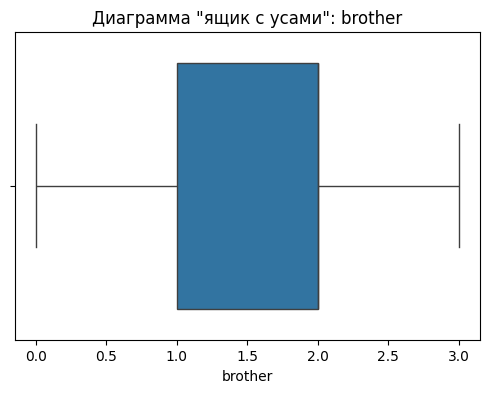

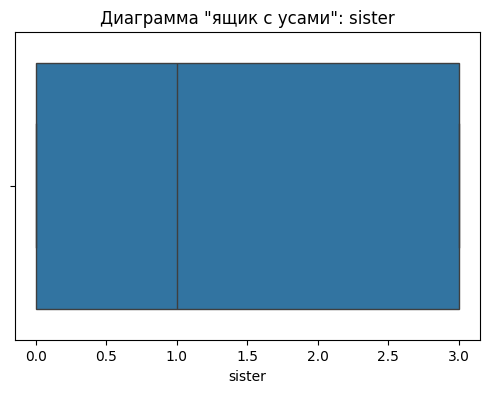

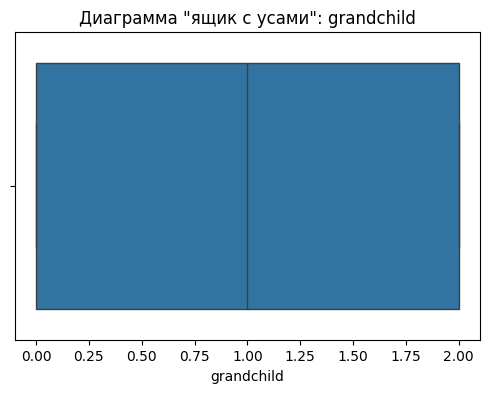


Примеры текстовых описаний:
0    The estate is worth $801,536.08. There are deb...
1    The estate is worth $943,375.41. There are deb...
2    The estate is worth $678,251.95. There are deb...
3    The estate is worth $364,967.06. There are deb...
4    The estate is worth $663,414.47. There are deb...
Name: text, dtype: object


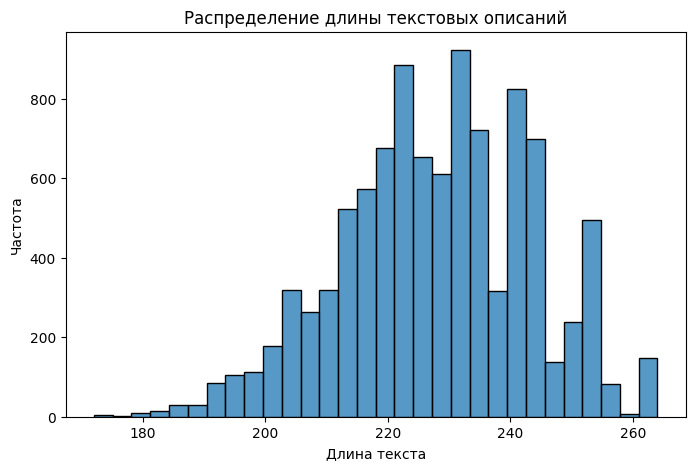

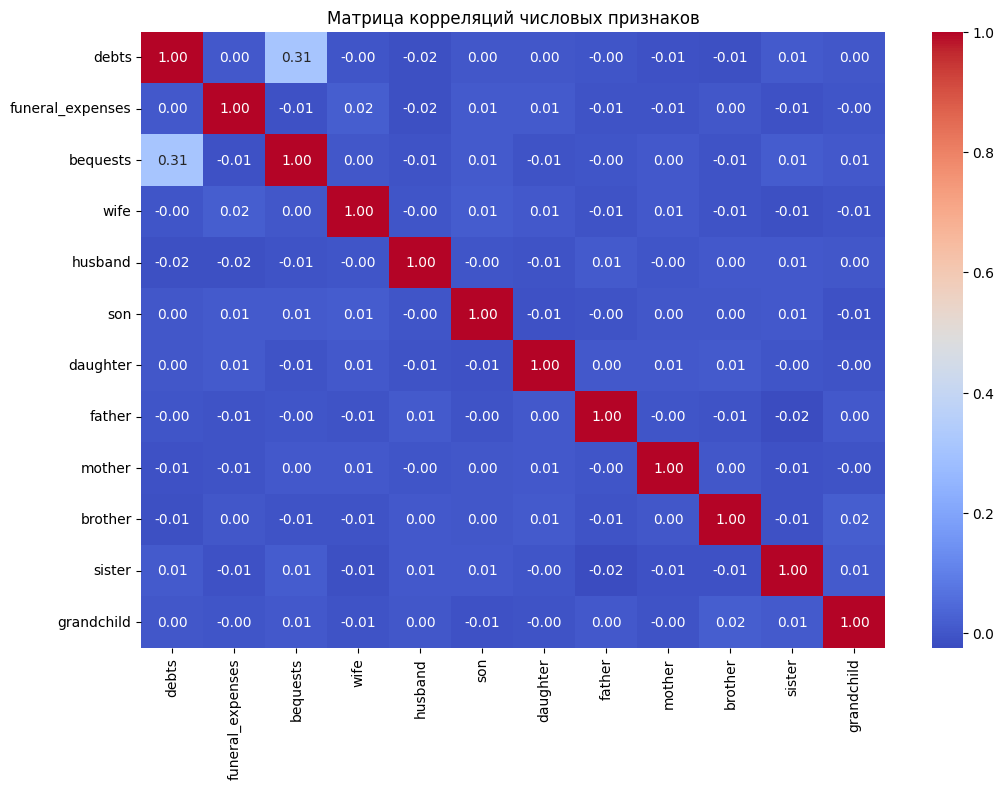

Краткие статистики по числовым признакам:
                debts  funeral_expenses       bequests          wife  \
count   10000.000000      10000.000000   10000.000000  10000.000000   
mean    66114.075550       5494.843407   76554.941016      0.502400   
std     55033.920158       2605.665586   64457.475334      0.500019   
min         2.130000       1000.030000      24.520000      0.000000   
25%     20566.652500       3237.277500   23697.625000      0.000000   
50%     51260.270000       5495.665000   59067.190000      1.000000   
75%     99795.077500       7742.445000  115633.610000      1.000000   
max    246943.130000       9999.530000  320499.220000      1.000000   

            husband          son      daughter        father        mother  \
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean       0.499400      2.51110      2.482200      0.503300      0.503600   
std        0.500025      1.70557      1.691085      0.500014      0.500012   
min  

In [3]:
# --------------------------------------------------------------Лабораторная работа №2: Анализ распределений и корреляций
# ---  Загрузка данных ---
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = pd.read_csv(url)
# ---  Определение числовых и категориальных признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
# Числовые признаки (финансовые и количественные)
numerical_features = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'son', 'daughter',
    'father', 'mother', 'brother', 'sister', 'grandchild'
]

# Категориальные признаки (в данном датасете только текстовое описание)--------------------------------------------------------------------------------------------------------------------------------------------------------
categorical_features = ['text']

# ---  Очистка числовых данных от пропусков -----------------------------------------------------------------------------------------------------------------------------------------------------------
df_num = df[numerical_features].dropna()

# ---  Анализ распределения числовых признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Гистограмма распределения--------------------------------------------------------------------------------------------------------------------------------------------------------
    plt.subplot(1, 2, 1)
    sns.histplot(df_num[feature], bins=30, kde=False)
    plt.title(f'Гистограмма распределения: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

    # График плотности--------------------------------------------------------------------------------------------------------------------------------------------------------
    plt.subplot(1, 2, 2)
    sns.kdeplot(df_num[feature], fill=True)
    plt.title(f'График плотности: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Плотность')

    plt.tight_layout()
    plt.show()

# ---  Диаграммы "ящик с усами" для выявления выбросов -----------------------------------------------------------------------------------------------------------------------------------------------------------
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_num[feature])
    plt.title(f'Диаграмма "ящик с усами": {feature}')
    plt.xlabel(feature)
    plt.show()

# --- Анализ распределения категориальных признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
# Для текстового поля можно вывести несколько примеров и длину текста
print("\nПримеры текстовых описаний:")
print(df['text'].head(5))
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30)
plt.title('Распределение длины текстовых описаний')
plt.xlabel('Длина текста')
plt.ylabel('Частота')
plt.show()

# ---  Анализ взаимосвязей (корреляций) числовых признаков -----------------------------------------------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций числовых признаков')
plt.show()

# --- Краткие выводы ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
print("Краткие статистики по числовым признакам:\n", df_num.describe())

# Пример анализа:
# - Высокая корреляция между количеством сыновей и дочерей может указывать на большие семьи.
# - Финансовые признаки (долги, расходы на похороны, завещания) могут быть скоррелированы между собой.
# - Выбросы в признаках debts, bequests и funeral_expenses могут указывать на редкие, но крупные случаи.



In [ ]:
pip install numpy


Данные успешно загружены из URL.

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              10000 non-null  object 
 1   debts             10000 non-null  float64
 2   funeral_expenses  10000 non-null  float64
 3   bequests          10000 non-null  float64
 4   wife              10000 non-null  int64  
 5   husband           10000 non-null  int64  
 6   son               10000 non-null  int64  
 7   daughter          10000 non-null  int64  
 8   father            10000 non-null  int64  
 9   mother            10000 non-null  int64  
 10  brother           10000 non-null  int64  
 11  sister            10000 non-null  int64  
 12  grandchild        10000 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1015.8+ KB
None

Статистика по пропущенным значениям:
text                0
de

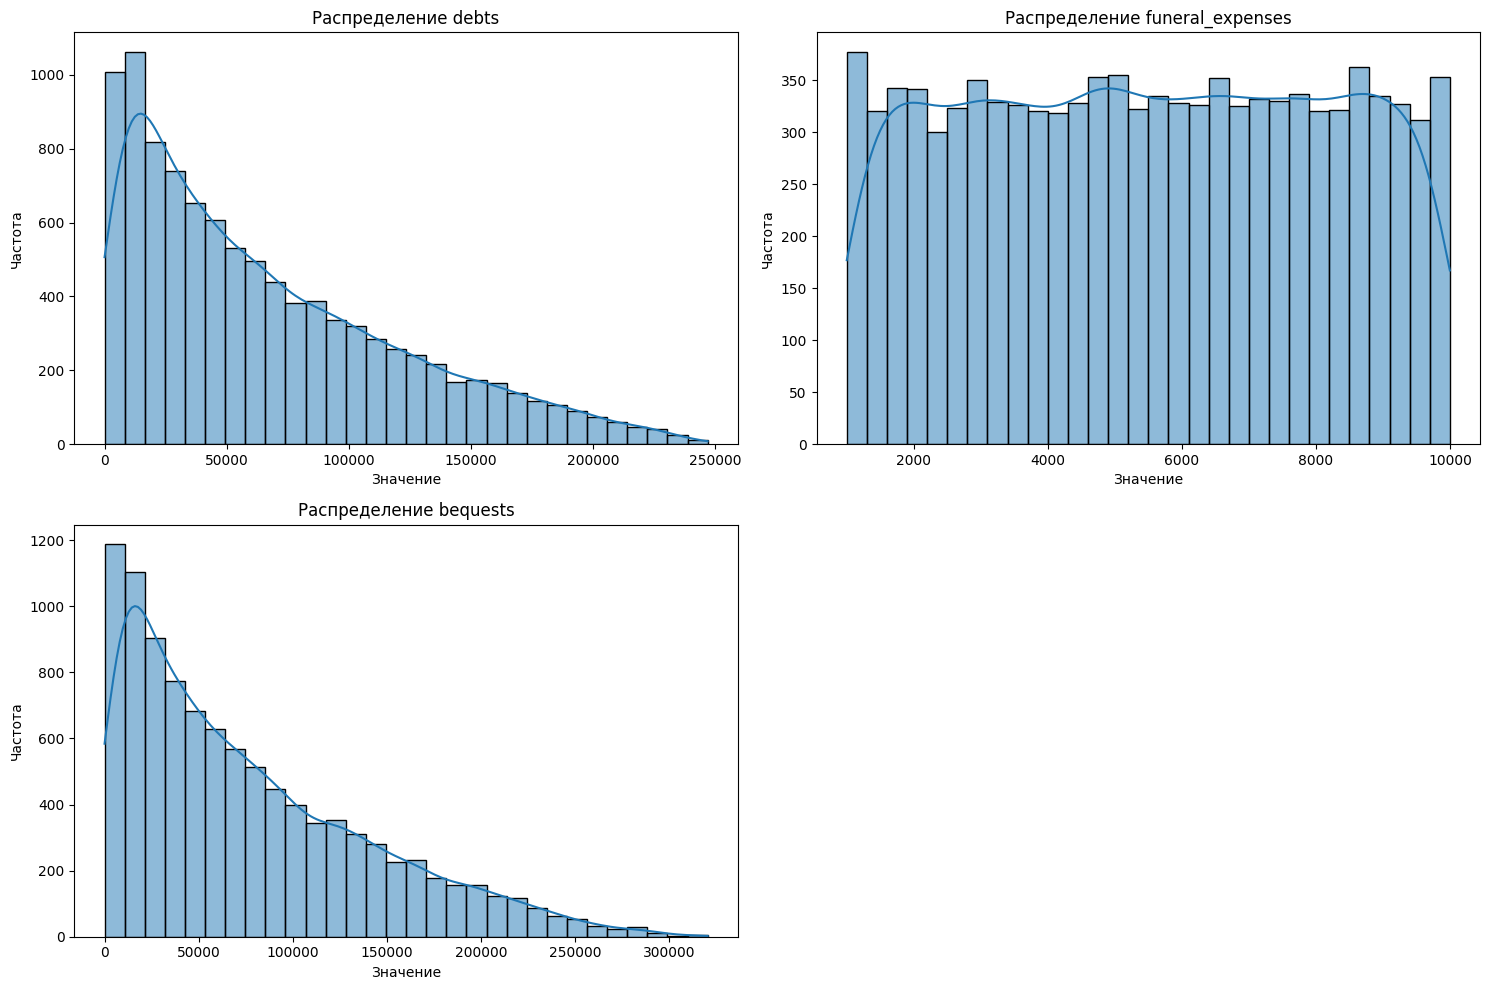

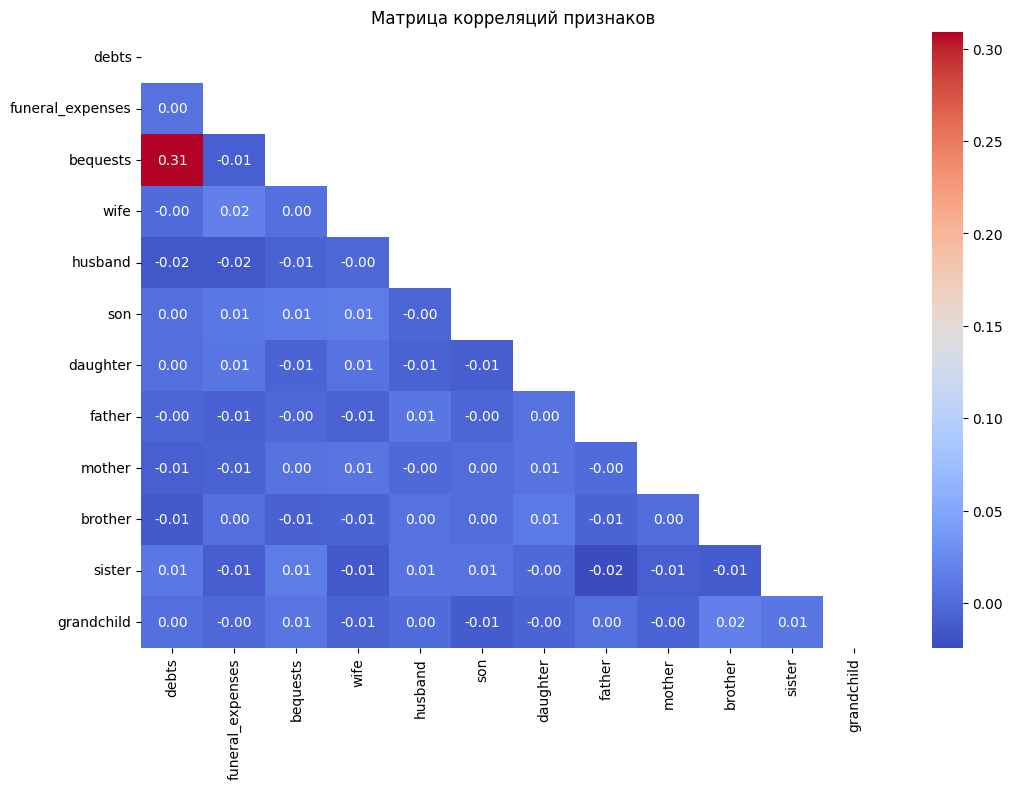

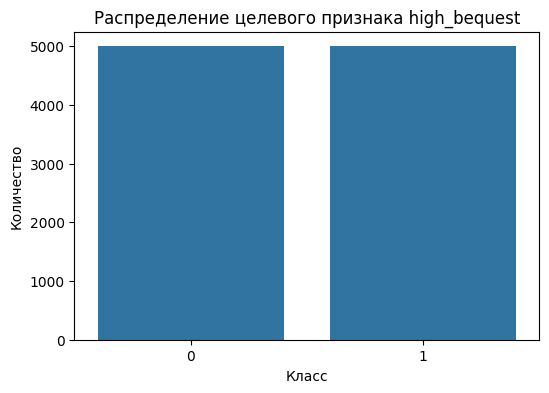


Баланс классов:
high_bequest
1    5000
0    5000
Name: count, dtype: int64

До SMOTE: Counter({0: 4000, 1: 4000})

KNN кросс-валидация F1-score: 0.5507 ± 0.0159
KNN обучена за 1.20 секунд

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1000
           1       0.57      0.55      0.56      1000

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



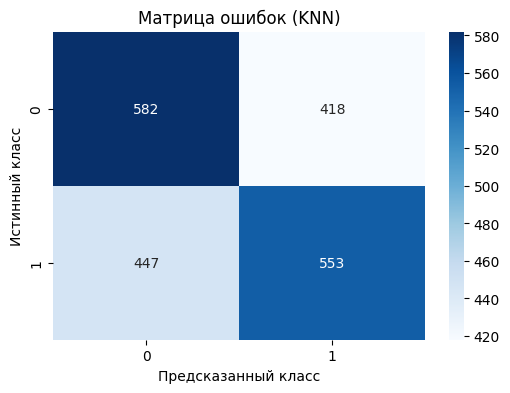

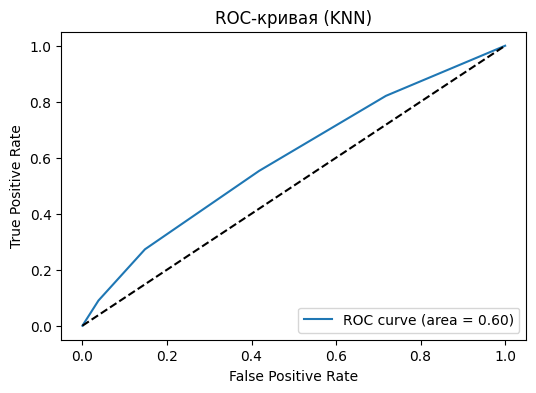


Random Forest кросс-валидация F1-score: 0.6243 ± 0.0096
Random Forest обучена за 7.19 секунд

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1000
           1       0.62      0.64      0.63      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



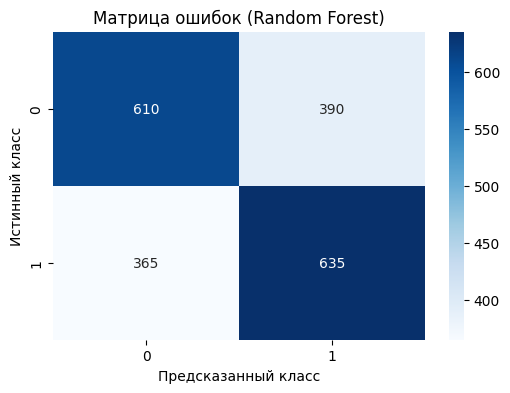

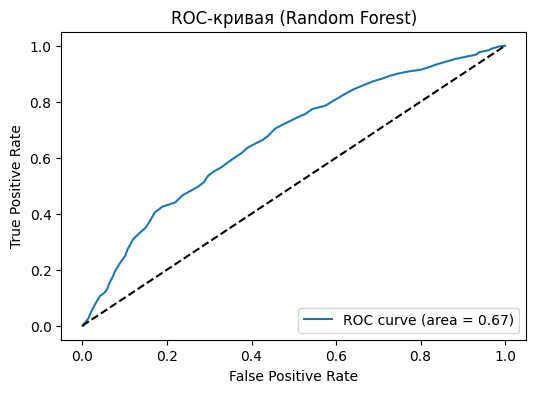


Лучшие параметры KNN: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}

KNN (optimized) Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1000
           1       0.59      0.56      0.57      1000

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.58      0.58      0.58      2000



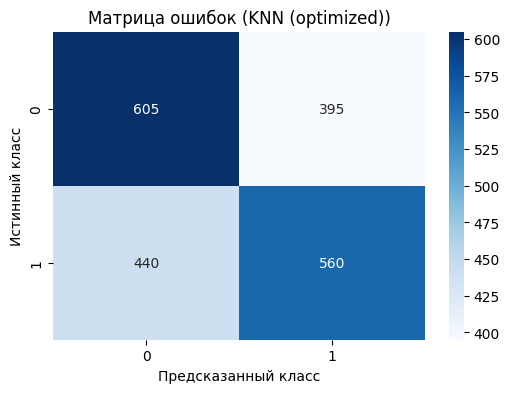

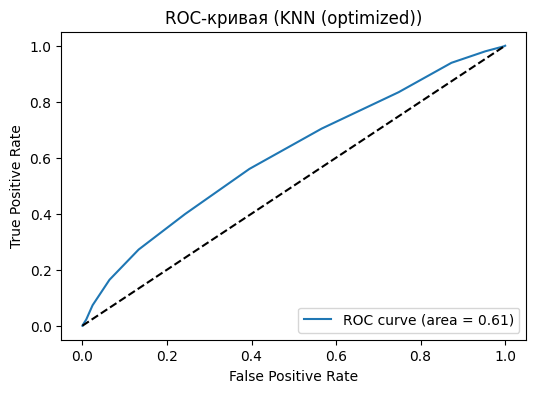

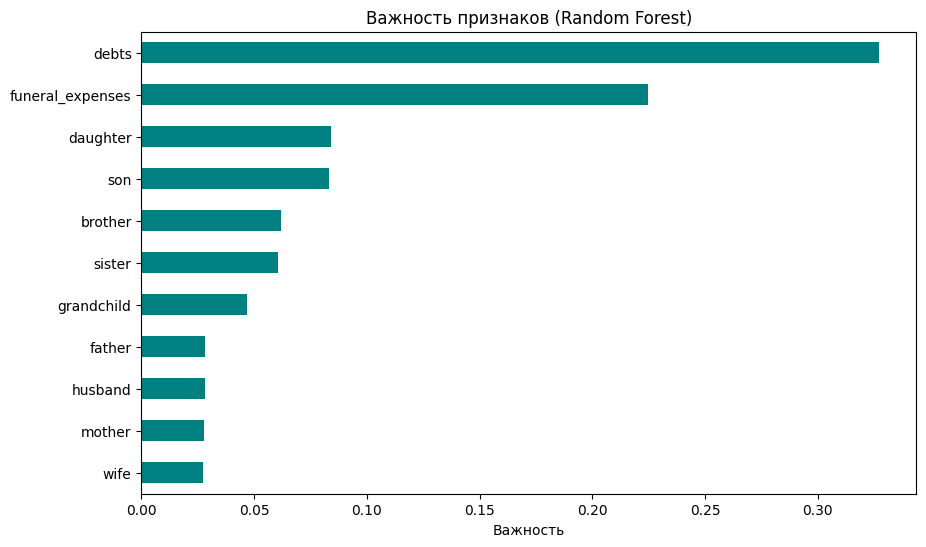

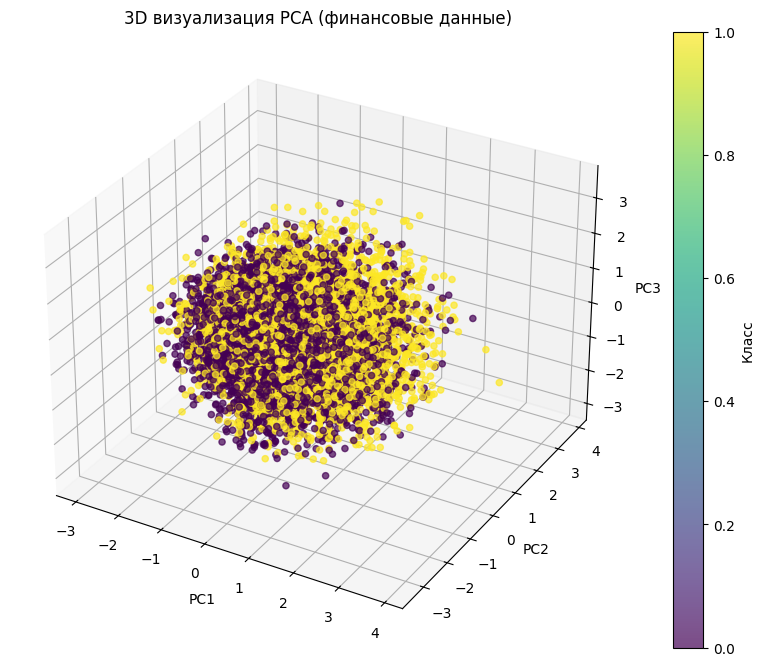

In [ ]:
# ------------------------------------------
# Импорт библиотек
# ------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
import time

# ------------------------------------------
# 1. Загрузка и предварительный анализ данных
# ------------------------------------------
def load_data(url):
    try:
        df = pd.read_csv(url)
        print("Данные успешно загружены из URL.")
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        from google.colab import files
        uploaded = files.upload()
        df = pd.read_csv(next(iter(uploaded)))
        print("Данные успешно загружены из локального файла.")
    return df

url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = load_data(url)

# Проверка базовой информации
print("\nИнформация о данных:")
print(df.info())

print("\nСтатистика по пропущенным значениям:")
print(df.isnull().sum())

print("\nКоличество дубликатов:", df.duplicated().sum())

# Удаляем дубликаты, если есть
df = df.drop_duplicates()

# Выбор и проверка признаков
feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]

df_clean = df[feature_columns].dropna()
print(f"\nРазмер данных после удаления пропусков: {df_clean.shape}")

# ------------------------------------------
# 2. Расширенная визуализация данных
# ------------------------------------------
def plot_histograms(df, columns):
    plt.figure(figsize=(15,10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Распределение {col}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

plot_histograms(df_clean, ['debts', 'funeral_expenses', 'bequests'])

# Матрица корреляций с маской
plt.figure(figsize=(12,8))
corr_matrix = df_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Матрица корреляций признаков')
plt.show()

# ------------------------------------------
# 3. Подготовка данных для моделирования
# ------------------------------------------
median_bequest = df_clean['bequests'].median()
df_clean['high_bequest'] = (df_clean['bequests'] >= median_bequest).astype(int)

# Визуализация распределения целевого признака
plt.figure(figsize=(6,4))
sns.countplot(x='high_bequest', data=df_clean)
plt.title('Распределение целевого признака high_bequest')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

# Проверка баланса классов
class_counts = df_clean['high_bequest'].value_counts()
print(f"\nБаланс классов:\n{class_counts}")

X = df_clean.drop(columns=['high_bequest', 'bequests'])
y = df_clean['high_bequest']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Если классы несбалансированы, применим SMOTE для увеличения меньшего класса
from collections import Counter
print(f"\nДо SMOTE: {Counter(y_train)}")
if min(class_counts) / max(class_counts) < 0.5:
    smote = SMOTE(random_state=42)
    X_train_scaled, y_train = smote.fit_resample(X_train_scaled, y_train)
    print(f"После SMOTE: {Counter(y_train)}")

# ------------------------------------------
# 4. Функция для оценки модели
# ------------------------------------------
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f'\n{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))

    # Матрица ошибок
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок ({model_name})')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()

    # ROC-кривая и AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        # Для моделей без predict_proba (например, KNN с метрикой manhattan) используем decision_function или предсказания
        y_proba = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая ({model_name})')
    plt.legend(loc='lower right')
    plt.show()

# ------------------------------------------
# 5. Обучение и сравнение моделей с кросс-валидацией
# ------------------------------------------
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced')
}

for name, model in models.items():
    start_time = time.time()
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    print(f"\n{name} кросс-валидация F1-score: {scores.mean():.4f} ± {scores.std():.4f}")

    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    print(f"{name} обучена за {end_time - start_time:.2f} секунд")

    evaluate_model(model, X_test_scaled, y_test, name)

# ------------------------------------------
# 6. Оптимизация гиперпараметров для KNN
# ------------------------------------------
param_grid = {
    'n_neighbors': range(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_knn = grid_search.best_estimator_
print(f'\nЛучшие параметры KNN: {grid_search.best_params_}')

evaluate_model(best_knn, X_test_scaled, y_test, "KNN (optimized)")

# ------------------------------------------
# 7. Анализ важности признаков (Random Forest)
# ------------------------------------------
forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
forest.fit(X_train_scaled, y_train)

feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10,6))
feat_importances.plot(kind='barh', color='teal')
plt.title('Важность признаков (Random Forest)')
plt.xlabel('Важность')
plt.show()

# ------------------------------------------
# 8. Расширенная визуализация с PCA и t-SNE
# ------------------------------------------
# PCA для 3D визуализации
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_train, cmap='viridis', alpha=0.7)
ax.set_title('3D визуализация PCA (финансовые данные)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter, label='Класс')
plt.show()

# t-SNE визуализация с подписями классов
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_train_scaled)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train, palette='coolwarm', alpha=0.7)
plt.title('t-SNE визуализация распределения классов')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Класс')
plt.show()


In [ ]:
#---------------------------------------------------------- Лабораторная работа №4:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ------------------------------------------
# 1. Загрузка данных
# ------------------------------------------
try:
    url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
    df = pd.read_csv(url)
except Exception as e:
    print(f"Ошибка загрузки данных: {e}")
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(next(iter(uploaded)))

print("Размер данных:", df.shape)
print("Пример данных:")
print(df.head())

# ------------------------------------------
# 2. Выбор нужных столбцов и очистка
# ------------------------------------------
feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]

df_selected = df[feature_columns]

# Проверяем пропуски и заполняем медианой
df_selected.fillna(df_selected.median(), inplace=True)

# ------------------------------------------
# 3. Определение целевой переменной
# ------------------------------------------
# Для примера создадим бинарную целевую переменную: высокие долги или нет
median_debts = df_selected['debts'].median()
df_selected['high_debts'] = (df_selected['debts'] >= median_debts).astype(int)

X = df_selected.drop(columns=['high_debts', 'debts'])
y = df_selected['high_debts']

# ------------------------------------------
# 4. Разделение и масштабирование
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_std = StandardScaler()
X_train_scaled = scaler_std.fit_transform(X_train)
X_test_scaled = scaler_std.transform(X_test)

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# ------------------------------------------
# 5. Функция для оценки выбора признаков и визуализации
# ------------------------------------------
def evaluate_feature_selection(score_func, score_func_name, X_train, X_test, y_train, y_test, feature_names, max_features=12):
    feature_counts = list(range(1, min(X_train.shape[1], max_features) + 1))
    scores = []
    selected_features_dict = {}

    for k in feature_counts:
        selector = SelectKBest(score_func, k=k)
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)

        model = RandomForestRegressor(random_state=42)
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)

        r2 = r2_score(y_test, y_pred)
        scores.append(r2)

        selected = [f for f, s in zip(feature_names, selector.get_support()) if s]
        selected_features_dict[k] = selected

    plt.figure(figsize=(10,6))
    plt.plot(feature_counts, scores, marker='o', label=score_func_name)
    plt.xlabel('Количество признаков')
    plt.ylabel('R² (коэффициент детерминации)')
    plt.title(f'Зависимость R² от количества признаков ({score_func_name})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return feature_counts, scores, selected_features_dict

# ------------------------------------------
# 6. Оценка с f_classif
# ------------------------------------------
feature_names = X.columns.tolist()

fc_counts, fc_scores, fc_features = evaluate_feature_selection(
    f_classif, 'f_classif', X_train_scaled, X_test_scaled, y_train, y_test, feature_names
)

# ------------------------------------------
# 7. Оценка с chi2
# ------------------------------------------
chi_counts, chi_scores, chi_features = evaluate_feature_selection(
    chi2, 'chi2', X_train_minmax, X_test_minmax, y_train, y_test, feature_names
)

# ------------------------------------------
# 8. Итоговая таблица результатов
# ------------------------------------------
results_df = pd.DataFrame({
    'Количество признаков': fc_counts,
    'R² (f_classif)': fc_scores,
    'Выбранные признаки (f_classif)': [", ".join(fc_features[k]) for k in fc_counts],
    'R² (chi2)': chi_scores,
    'Выбранные признаки (chi2)': [", ".join(chi_features[k]) for k in chi_counts],
})

print(results_df.head(10))

results_df.to_csv('feature_selection_results.csv', index=False)
print("Результаты сохранены в 'feature_selection_results.csv'")

# ------------------------------------------
# 9. Важность признаков с RandomForest
# ------------------------------------------
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)

importances = pd.Series(model_rf.feature_importances_, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(10,6))
importances.plot(kind='barh')
plt.title('Важность признаков (Random Forest)')
plt.xlabel('Важность')
plt.show()


In [ ]:
#---------------------------------------------------------- Лабораторная работа №5:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    pairwise_distances,
)

# ------------------------------------------
# 1. Загрузка и подготовка данных
# ------------------------------------------
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = pd.read_csv(url)

# Выбор нужных столбцов
feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]

# Обработка пропусков и масштабирование
X = df[feature_columns].dropna().copy()
X.fillna(X.median(), inplace=True)  # Заполнение пропусков медианой

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# ------------------------------------------
# 2. PCA для визуализации
# ------------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# ------------------------------------------
# 3. Функции для оценки кластеризации
# ------------------------------------------
def evaluate_clustering(X, labels):
    if len(set(labels)) <= 1 or (set(labels) == {-1}):
        return None, None, None
    return (
        silhouette_score(X, labels),
        calinski_harabasz_score(X, labels),
        davies_bouldin_score(X, labels)
    )

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    if len(unique_clusters) <= 1 or (set(unique_clusters) == {-1}):
        return None

    distances = pairwise_distances(X)
    intra_dists = []
    inter_dists = []

    for c in unique_clusters:
        if c == -1: continue
        indices = np.where(labels == c)[0]
        if len(indices) > 1:
            intra_dists.append(np.max(distances[np.ix_(indices, indices)]))

    for i in range(len(unique_clusters)):
        for j in range(i+1, len(unique_clusters)):
            if -1 in (unique_clusters[i], unique_clusters[j]): continue
            i_idx = np.where(labels == unique_clusters[i])[0]
            j_idx = np.where(labels == unique_clusters[j])[0]
            inter_dists.append(np.min(distances[np.ix_(i_idx, j_idx)]))

    return min(inter_dists)/max(intra_dists) if intra_dists and inter_dists else None

def plot_clusters(pca_data, labels, title):
    unique_labels = set(labels) - {-1}
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(10,6))
    for k, col in zip(unique_labels, colors):
        mask = (labels == k)
        plt.scatter(pca_data[mask,0], pca_data[mask,1],
                    c=[col],
                    label=f'Cluster {k}' if k != -1 else 'Noise',
                    s=50, edgecolor='k')

    sil, ch, db = evaluate_clustering(pca_data, labels)
    metrics = f"Silhouette: {sil:.2f} | Davies-Bouldin: {db:.2f}" if sil else ""
    plt.title(f"{title}\n{metrics}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------------------------
# 4. Кластеризация и визуализация
# ------------------------------------------
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(scaled_data)
plot_clusters(pca_data, labels_kmeans, "KMeans Clustering")

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(scaled_data)
plot_clusters(pca_data, labels_agglo, "Agglomerative Clustering")

# DBSCAN (оптимизированные параметры)
db = DBSCAN(eps=1.5, min_samples=10)
labels_dbscan = db.fit_predict(scaled_data)
plot_clusters(pca_data, labels_dbscan, "DBSCAN Clustering")

# ------------------------------------------
# 5. Сравнение метрик
# ------------------------------------------
metrics = {
    'Silhouette': [
        silhouette_score(scaled_data, labels_kmeans),
        silhouette_score(scaled_data, labels_agglo),
        silhouette_score(scaled_data, labels_dbscan)
    ],
    'Davies-Bouldin': [
        davies_bouldin_score(scaled_data, labels_kmeans),
        davies_bouldin_score(scaled_data, labels_agglo),
        davies_bouldin_score(scaled_data, labels_dbscan)
    ],
    'Dunn Index': [
        dunn_index(scaled_data, labels_kmeans),
        dunn_index(scaled_data, labels_agglo),
        dunn_index(scaled_data, labels_dbscan)
    ]
}

results_df = pd.DataFrame(metrics, index=['KMeans', 'Agglomerative', 'DBSCAN'])
print("\nСводная таблица метрик:")
print(results_df)

# Визуализация метрик
results_df.plot(kind='bar', subplots=True, layout=(1,3), figsize=(18,5),
                color=['skyblue', 'salmon', 'lightgreen'], edgecolor='k')
plt.suptitle("Сравнение метрик кластеризации")
plt.tight_layout()
plt.show()


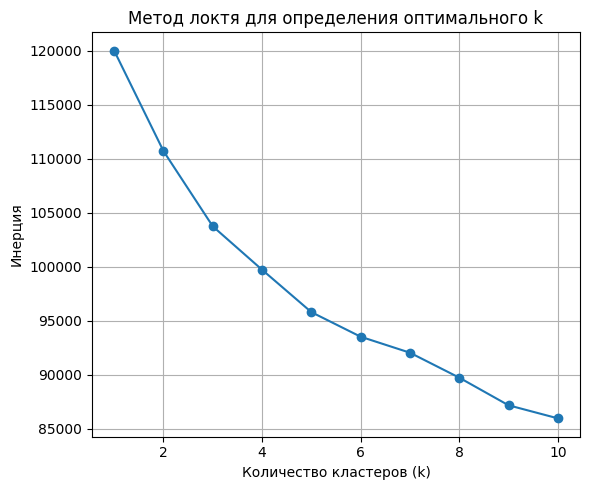

Количество объектов в каждом кластере:
Cluster
2    3753
0    3748
1    2499
Name: count, dtype: int64

Примеры из кластера 0:
                                                 text      debts  \
0   The estate is worth $801,536.08. There are deb...  136423.38   
2   The estate is worth $678,251.95. There are deb...  137791.13   
3   The estate is worth $364,967.06. There are deb...   74310.09   
5   The estate is worth $152,855.39. There are deb...     454.23   
10  The estate is worth $480,258.10. There are deb...   63812.02   

    funeral_expenses  bequests  wife  husband  son  daughter  father  mother  \
0            7866.29  70554.96     1        0    5         4       0       0   
2            6276.24  19846.02     1        1    3         5       0       0   
3            9243.89  81648.92     0        0    4         0       0       0   
5            7859.73   1920.94     0        1    0         2       0       1   
10           2239.10   1991.06     0        0    4         5    

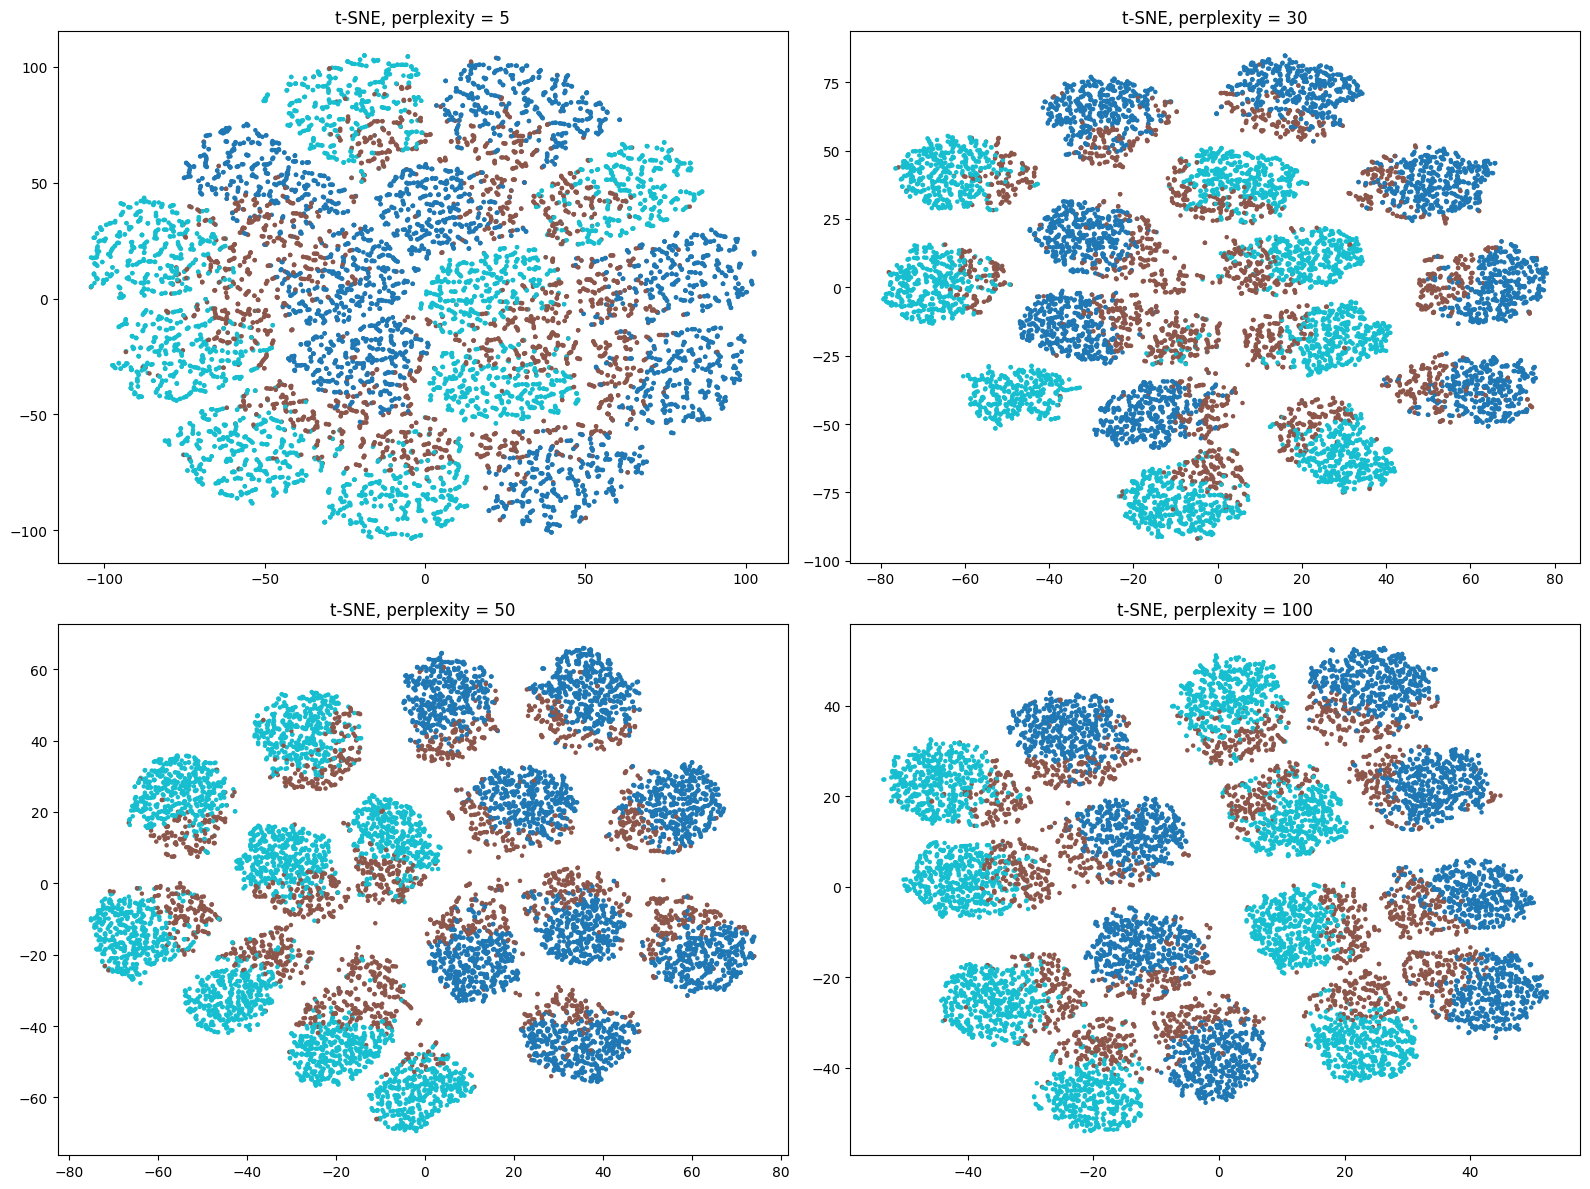

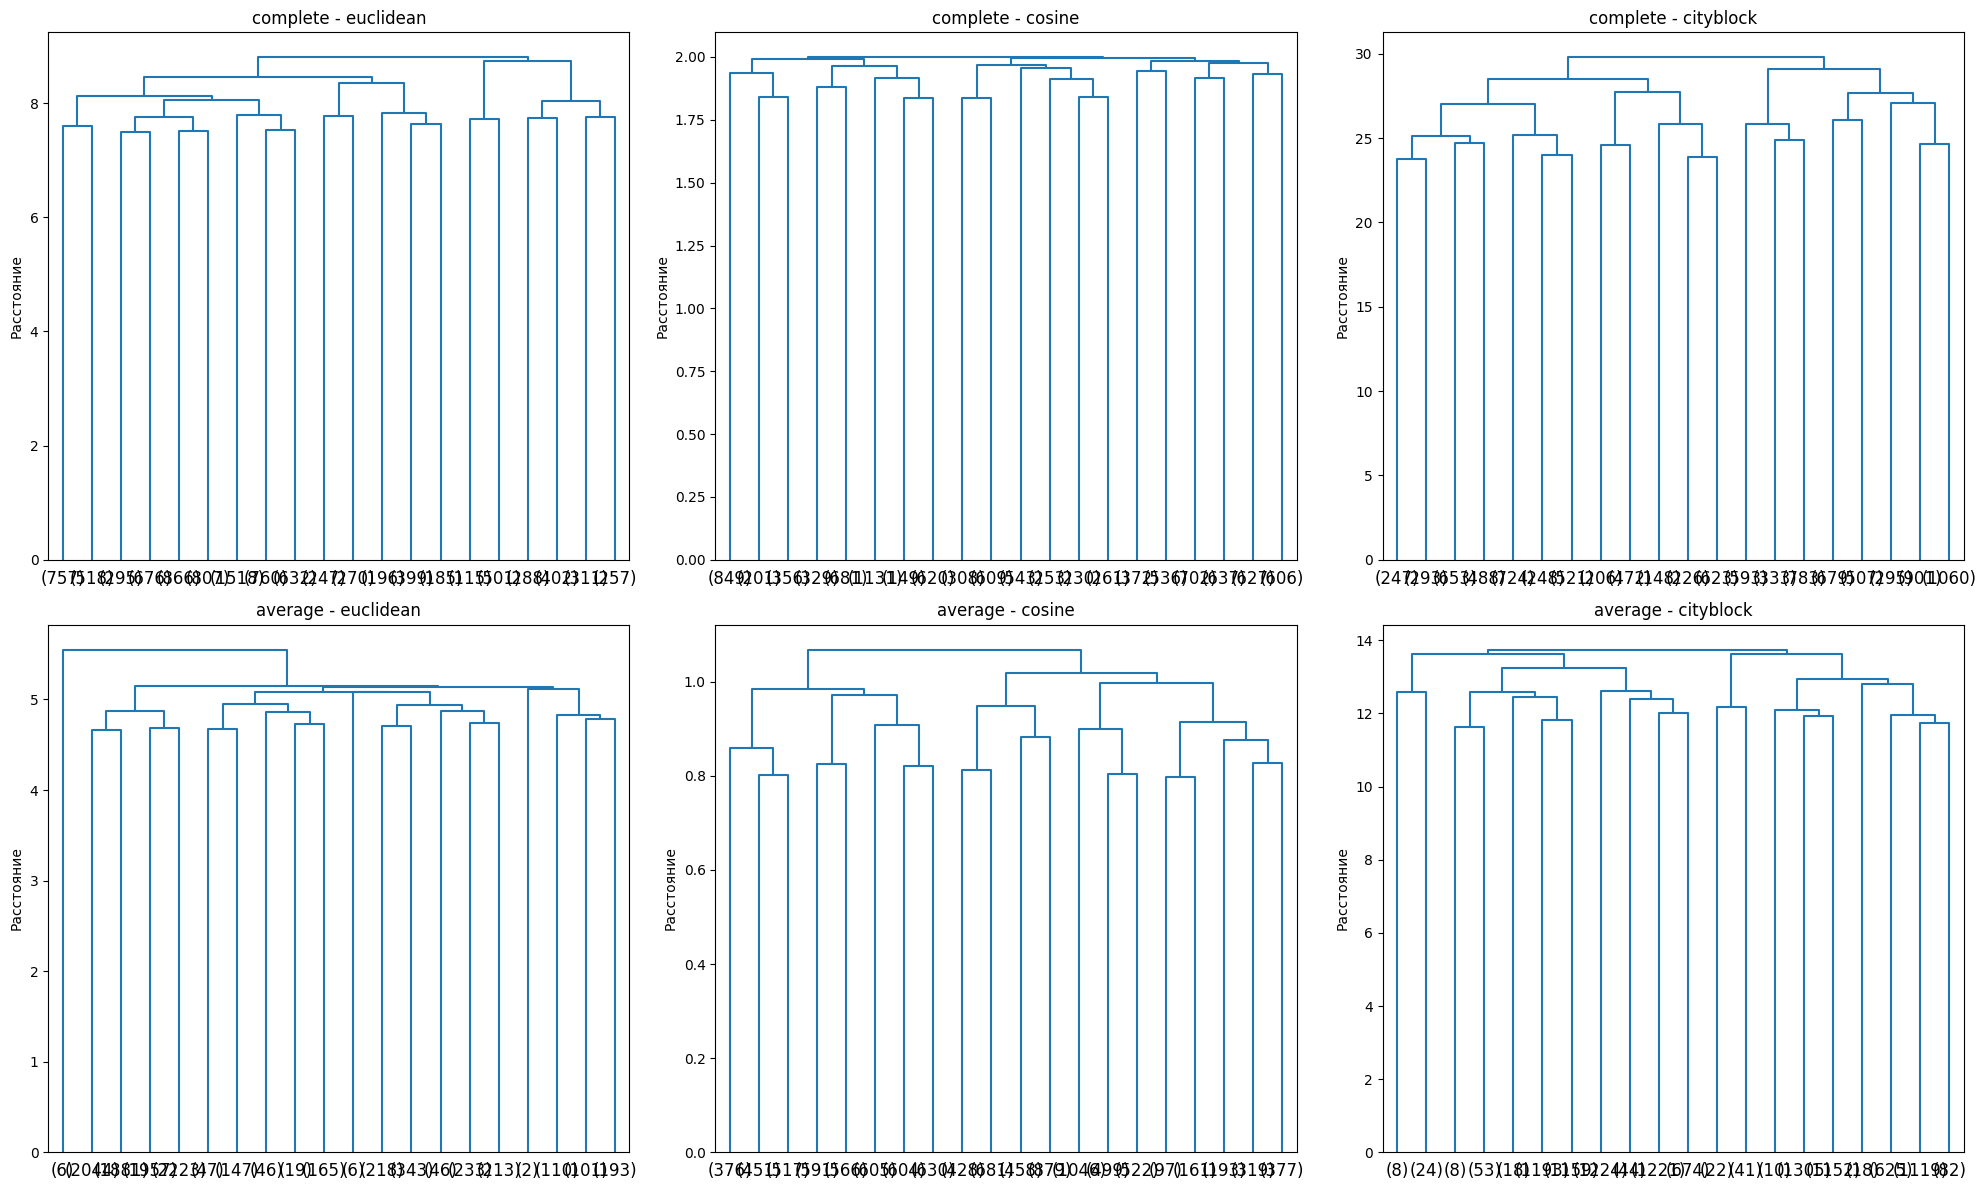

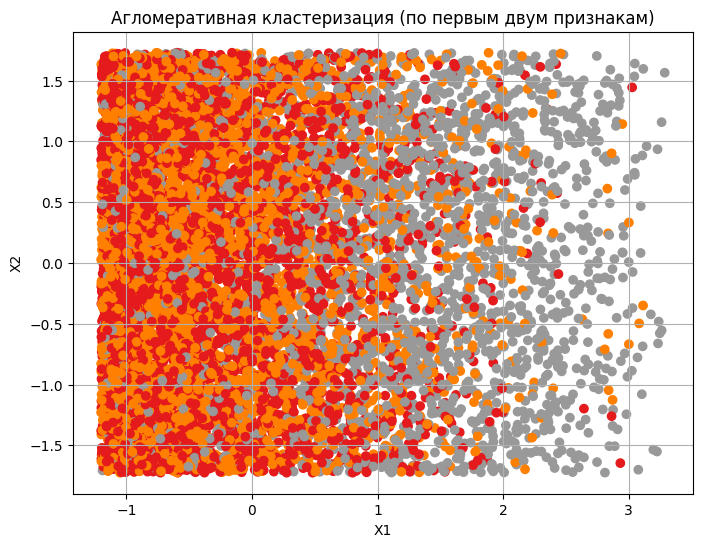

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, pairwise_distances, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

# 1. Загрузка и подготовка данных
url = "https://github.com/Altaieb-Mohammed/pytorch-tutorial-YouTube-/raw/main/synthetic_inheritance_data.csv"
df = pd.read_csv(url)

feature_columns = [
    'debts', 'funeral_expenses', 'bequests', 'wife', 'husband',
    'son', 'daughter', 'father', 'mother', 'brother', 'sister', 'grandchild'
]
X = df[feature_columns].dropna()
X_scaled = StandardScaler().fit_transform(X)

# 2. Метод локтя для KMeans++
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Метод локтя для определения оптимального k")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Инерция")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Кластеризация KMeans++ (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

print("Количество объектов в каждом кластере:")
print(df_with_clusters['Cluster'].value_counts())

for i in range(3):
    print(f"\nПримеры из кластера {i}:")
    print(df_with_clusters[df_with_clusters['Cluster'] == i].head(5))

# 4. Визуализация кластеров с помощью t-SNE
from sklearn.manifold import TSNE

perplexities = [5, 30, 50, 100]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, p in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    labels = kmeans.labels_
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=5)
    ax.set_title(f"t-SNE, perplexity = {p}")

plt.tight_layout()
plt.show()

# 5. Агломеративная кластеризация и дендрограммы
methods = ['complete', 'average']
metrics = ['euclidean', 'cosine', 'cityblock']

fig, axes = plt.subplots(len(methods), len(metrics), figsize=(20, 12))
for i, method in enumerate(methods):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        Z = linkage(X_scaled, method=method, metric=metric)
        dendrogram(Z, ax=ax, truncate_mode='lastp', p=20)
        ax.set_title(f"{method} - {metric}")
        ax.set_ylabel("Расстояние")
plt.tight_layout()
plt.show()

# 6. Агломеративная кластеризация (3 кластера)
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_agg = agg_cluster.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_agg, cmap='Set1')
plt.title("Агломеративная кластеризация (по первым двум признакам)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

# 7. DBSCAN: подбор параметров и метрик
eps_values = np.arange(0.5, 2.1, 0.1)
min_samples_values = range(3, 11)
metrics_list = ['euclidean', 'manhattan']
results = []

for metric in metrics_list:
    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
            labels = db.fit_predict(X_scaled)
            mask = labels != -1
            n_clusters = len(set(labels[mask]))
            n_noise = np.sum(labels == -1)
            if n_clusters > 1:
                silhouette = silhouette_score(X_scaled[mask], labels[mask])
                calinski = calinski_harabasz_score(X_scaled[mask], labels[mask])
                davies = davies_bouldin_score(X_scaled[mask], labels[mask])
            else:
                silhouette, calinski, davies = -1, np.nan, np.nan
            results.append({
                'metric': metric,
                'eps': round(eps, 2),
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': silhouette,
                'calinski': calinski,
                'davies_bouldin': davies
            })

df_dbscan = pd.DataFrame(results)
df_dbscan.to_csv("dbscan_grid_search.csv", index=False)
print("\nТоп-10 по silhouette (DBSCAN):")
print(df_dbscan.sort_values(by='silhouette', ascending=False).head(10))

# 8. Dunn Index
def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    clusters = [np.where(labels == c)[0] for c in unique_clusters if c != -1]
    if len(clusters) < 2:
        return 0
    inter_cluster_dists = []
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = cdist(X[clusters[i]], X[clusters[j]], metric='euclidean')
            inter_cluster_dists.append(np.min(dist))
    if len(inter_cluster_dists) == 0:
        return 0
    inter_cluster_dist = np.min(inter_cluster_dists)
    intra_cluster_diameters = []
    for cluster in clusters:
        if len(cluster) > 1:
            dists = cdist(X[cluster], X[cluster], metric='euclidean')
            intra_cluster_diameters.append(np.max(dists))
        else:
            intra_cluster_diameters.append(0)
    intra_cluster_diam = np.max(intra_cluster_diameters)
    return inter_cluster_dist / intra_cluster_diam if intra_cluster_diam else 0

# 9. Сравнение алгоритмов по метрикам
models = {
    "KMeans": KMeans(n_clusters=3, random_state=42, n_init=10),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.9, min_samples=8),
    "OPTICS": OPTICS(min_samples=5)
}
silhouette_scores = {}
davies_bouldin_scores = {}
dunn_indices = {}
cluster_results = {}

for name, model in models.items():
    labels = model.fit_predict(X_scaled)
    mask = labels != -1
    silhouette_scores[name] = silhouette_score(X_scaled[mask], labels[mask]) if len(np.unique(labels[mask])) > 1 else 0
    davies_bouldin_scores[name] = davies_bouldin_score(X_scaled[mask], labels[mask]) if len(np.unique(labels[mask])) > 1 else np.nan
    dunn_indices[name] = dunn_index(X_scaled, labels)
    cluster_results[name] = labels

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].bar(silhouette_scores.keys(), silhouette_scores.values(), color="skyblue")
axes[0].set_title("Silhouette Score")
axes[1].bar(davies_bouldin_scores.keys(), davies_bouldin_scores.values(), color="salmon")
axes[1].set_title("Davies-Bouldin Index")
axes[2].bar(dunn_indices.keys(), dunn_indices.values(), color="lightgreen")
axes[2].set_title("Dunn Index")
plt.tight_layout()
plt.show()
